<a href="https://colab.research.google.com/github/cloeav/PPD/blob/main/Copia_de_HR_Measurement_GreenChannel_prueba_Juan60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Heart Rate Measurement using only the **Green Channel**

In [ ]:
# Import standard libraries
import cv2
import numpy as np
import math
from google.colab import drive
drive.mount('/content/drive')
from google.colab.patches import cv2_imshow

Mounted at /content/drive


In [ ]:
# open the video file
cap = cv2.VideoCapture('/content/drive/Shareddrives/Prácticas Profesionales/Videos/Juan60.mp4')

In [ ]:
# initialize variables for heart rate calculation
fps = cap.get(cv2.CAP_PROP_FPS)
fps = round(fps)
print(fps)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(frame_count)
signal_video = []

60
7002


In [ ]:
 # Function that detects the region of interest (ROI) where the face is located

def detect_roi(gray):
  face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/PPD/haarcascade_frontalface_default.xml')
  faces = face_cascade.detectMultiScale(gray, scaleFactor=1.6, minNeighbors=5)
  roi = frame[faces[0,1]:(faces[0,1]+faces[0,3]), faces[0,0]:(faces[0,0]+faces[0,2])]
  return faces,roi



In [ ]:
#Test the function "detect_roi" using the first frame

# ret, frame = cap.read()
# gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# faces, roi = detect_roi(gray)
# print(faces)
# cv2_imshow(roi)

The purpose of calculating the average value of the color channel intensities within the selected ROI is to obtain a single scalar value that represents the color information in the region of interest. This is done by taking the mean value of the intensities across all the pixels in the ROI.

By doing this, the code reduces the dimensionality of the color information in the ROI from a 2D array of pixel values to a 1D array of scalar values, which is easier to work with and process. Additionally, by using the mean value instead of individual pixel values, the code is less sensitive to small variations in pixel intensity and noise, which can improve the robustness of the heart rate measurement.


Normalizing the green channel is necessary to ensure that the pixel intensities are within a consistent range, typically between 0 and 255. This is because different images may have different intensity ranges due to variations in lighting conditions or camera settings. By normalizing the intensities, we can better compare pixel values across different images and ensure that our signal processing techniques are applied consistently.

In the code provided, cv2.normalize is used to scale the intensity values of the green channel to the range of 0-255.

In [ ]:
initial_frame = int(10*fps)
print(initial_frame)
final_frame = int(initial_frame + fps*60)
print(final_frame)

600
4200


In [ ]:
# Loop through each frame in the video to 

for i in range(1, final_frame):
    # read the frame
    ret, frame = cap.read()

    if i>=initial_frame and i<final_frame:
      # convert the frame to grayscale
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

      # detect the ROI
      faces,roi = detect_roi(gray)
      #cv2_imshow(roi)
      #print and show detected faces
      print(i)
      
      green_channel = roi[:,:,1]
      #cv2_imshow(green_channel)
      green_channel = cv2.normalize(green_channel, None, 0, 255, cv2.NORM_MINMAX)
      
      #add the green channel of the current frame to the signal list  
      signal_video.append(np.mean(green_channel))

600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849


In [ ]:
#print the number of frames used to obtain the signal 
print(len(signal_video))
#print(signal_video[0:30])


3600


In [ ]:
# apply a bandpass filter to remove noise from the signal
#Nyquist frequency = sampling rate (fps) / 2 = 30 / 2 = 15 Hz
#lowcut freq  ==>  60 bpm = 1 Hz (50 bmp)
#highcut freq ==>  100 bpm = 1.67 Hz (150 bmp)

from scipy.signal import butter, filtfilt, find_peaks

def butter_bandpass_filter(signal, lowcut, highcut, fs):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    order = 3
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, signal)
    return y

In [ ]:
# apply signal processing techniques

signal_video = np.array(signal_video)
print(signal_video)
filtered_signal = butter_bandpass_filter(signal_video, 1, 1.67, fps)
print(filtered_signal)


[111.4095955  111.93731916 110.82110065 ... 105.9648861  106.92574795
 105.57090052]
[0.20575058 0.20071219 0.19155626 ... 0.05330677 0.05455401 0.0538935 ]


In [ ]:
# Find the array of frequencies of each element in the FFT 
freqs = np.fft.fftfreq(filtered_signal.size, 1/fps)
fft = np.fft.fft(filtered_signal)

print(fft)
#peaks, _ = find_peaks((fft)) 
peaks, _ = find_peaks(np.abs(fft))

# print the number of peaks 
print(len(peaks))

# find and print the index of the highest peak
#max_peak_index = np.argmax((fft[peaks])) 
max_peak_index = np.argmax(np.abs(fft[peaks]))
#print(np.abs(fft[peaks]))
print(max_peak_index)

[-0.91677061+0.j         -0.91708451+0.0216812j  -0.91802744+0.04340116j
 ... -0.9196031 -0.06519894j -0.91802744-0.04340116j
 -0.91708451-0.0216812j ]
160
15


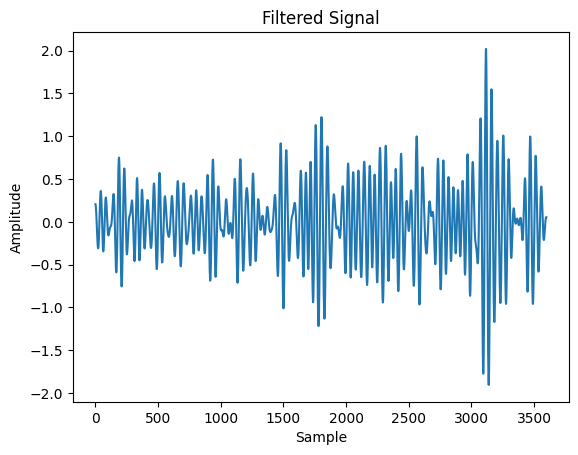

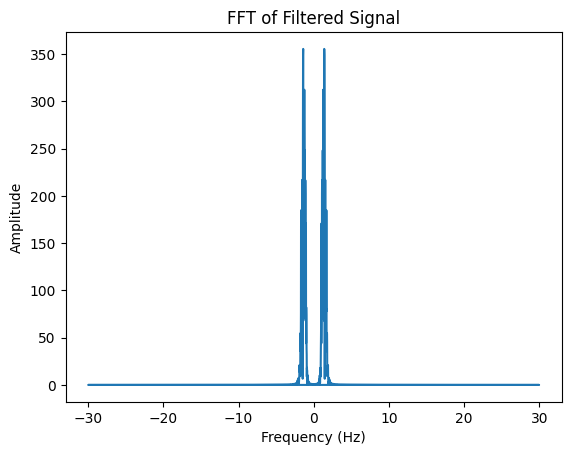

In [ ]:
import matplotlib.pyplot as plt
# plot the filtered signal
plt.plot(filtered_signal)
plt.title('Filtered Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# plot the FFT
plt.figure()
plt.plot(freqs, np.abs(fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of Filtered Signal')
plt.show()

In [ ]:

# identify the peak frequency that corresponds to the heart rate
heart_rate = freqs[peaks][max_peak_index] * 60

# print the heart rate
print("Heart rate: {:.2f} bpm".format(heart_rate))

Heart rate: 84.00 bpm


In [ ]:
# release the video file and close all windows
cap.release()
cv2.destroyAllWindows()

In [ ]:
import pandas as pd

data_video= pd.read_csv('/content/drive/Shareddrives/Prácticas Profesionales/Datos Pulsioximetro/juan_60_20230429154535.csv')
pulse_signal = data_video['PULSE']
#print(pulse_signal)

pulse_signal = pulse_signal[47:107]
#print(pulse_signal)
print(pulse_signal.shape)

heart_rate_csv = np.mean(pulse_signal)
print("Heart rate: {:.2f} bpm".format(heart_rate_csv))


(60,)
Heart rate: 85.35 bpm
